In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run src/preamble.py

### Choose datasets among

    - 'Grey1977'
    - 'Grey1978'
    - 'Iverson1993_Whole'
    - 'Iverson1993_Onset'
    - 'Iverson1993_Remainder'
    - 'McAdams1995'
    - 'Lakatos2000_Harm'
    - 'Lakatos2000_Perc'
    - 'Lakatos2000_Comb'
    - 'Barthet2010'
    - 'Patil2012_A3'
    - 'Patil2012_DX4'
    - 'Patil2012_GD4'
    - 'Siedenburg2016_e2set1'
    - 'Siedenburg2016_e2set2'
    - 'Siedenburg2016_e2set3'
    - 'Siedenburg2016_e3'
    
    

In [3]:
datasets = ['Grey1977','Grey1978','Siedenburg2016_e3']

### Choose an audio representation among

    - 'strf'
    - 'stft'
    - 'spectrum' (cochlea in the companion paper)
    - 'scattering'
    - 'clap'
    - 'encodec'
    - 'mert'
    - 'mertcat'

In [5]:
repres   = 'encodec'

### load the dissimilarity ratings and the audio sample representations and assess normalization

correct normalization


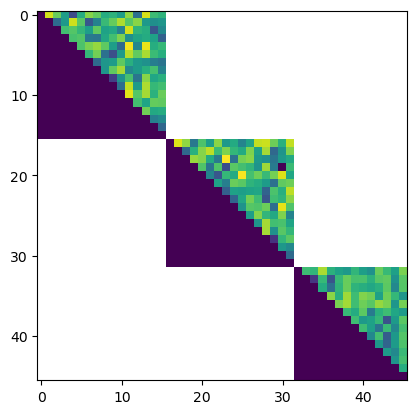

In [23]:
r,D,d   = load_data(datasets,repres)

plt.imshow(D)

if abs(np.mean(np.max(np.abs(r),axis=0)-1)) < 10**(-6):
       
    print('correct normalization')

## Metric learning

### parametric distance

For $\Psi$ an $n_{\Psi}$-dimensional representation
$$
 \mathsf{d}_{\boldsymbol{\mathsf{w}}}^{\Psi}(a_i, a_j )^2 = \sum_{k= 1}^{n_{\Psi}} \frac{1}{\mathsf{\boldsymbol{\mathsf{w}}}_k^2} \left(\Psi(a_i)_k - \Psi(a_j)_k\right)^2.
$$

### learning procedure

The weights are learned through

$$
\boldsymbol{\mathsf{w}}_\star \in \underset{\boldsymbol{\mathsf{w}} \in \mathbb{R}^{n_{\Psi}}}{\mathrm{Argmax}} \, \mathcal{P}(\mathsf{d}_{\boldsymbol{\mathsf{w}}}^\Psi, \boldsymbol{\mathsf{s}})
$$

with the reward function being the Pearson correlation between the weighted distance and human ratings

$$
\mathcal{P}(\mathsf{d}_{\boldsymbol{\mathsf{w}}}^{\Psi}, \boldsymbol{\mathsf{s}}) = \sum_{\lbrace i,j \rbrace} \frac{\left(\mathsf{d}_{\boldsymbol{\mathsf{w}}}^{\Psi} (a_i,a_j)^2 - \mu_{\boldsymbol{\mathsf{w}}}\right) \left(\mathsf{s}_{\lbrace i,j \rbrace} - \mu_{\boldsymbol{\mathsf{s}}} \right) }{\sigma_{\boldsymbol{\mathsf{w}}} \sigma_{\boldsymbol{\mathsf{s}}}}
$$

where $\mathsf{s}_{\lbrace i,j \rbrace}$ denotes the averaged dissimilarity rating for the pair of sounds $(a_i,a_j)$.


### initialization

to be chosen between 

    - 'warm'
    
    - 'random'
    
    

In [11]:
init = 'warm'

- *warm initialization* **(original)**

$$
\forall k \in \lbrace 1, \dots, n \rbrace, \quad \mathsf{w}_k = \frac{1}{\sqrt{\widehat{\mathsf{x}}_k + \varepsilon}}, \quad \varepsilon = 2\cdot 10^{-16}.
$$

where $\varepsilon$ is the machine precision, added in order to avoid division by zero, and $\widehat{\boldsymbol{\mathsf{x}}}$ is a solution the nonnegative least-square regression: 

$$
\widehat{\boldsymbol{\mathsf{x}}} \in \underset{x\in \mathbb{R}_+^{n_{\Psi}}}{\mathrm{Argmin}} \sum_{k = 1}^{n_{\Psi}} \sum_{\lbrace i,j \rbrace} \left( \left(\Psi_k(a_i) - \Psi_k(a_j)\right)^2  \mathsf{x}_k - \mathsf{s}_{\lbrace i,j \rbrace} \right)^2
$$

with $\mathsf{s}_{\lbrace i,j \rbrace}$ is the human dissimilarity rating for the pair of sounds $a_i$ and $a_j$.


    
- *random initialization* (Thoret, 2021, Nat. Hum. Behav.)
 
     
    $$
    \forall k \in \lbrace 1, \dots, n_{\Psi} \rbrace, \quad \mathsf{w}_k \sim \mathcal{N}(\mu, \sigma^2 \textbf{I}) \quad \text{i.i.d.}
    $$

    with by default $\mu = 1$ and $\sigma = 0.01$.

In [13]:
if init == 'warm':
    opt     = bfgs_log_kernel_w1(r,d)
else:
    opt     = bfgs_log_kernel(r,d)

BFGS has converged.


### explained variance of human ratings by the learned metric

Quantified through the squared Pearson correlation:

$$
\mathcal{P}(\mathsf{d}_{\boldsymbol{\mathsf{w}}_\star}^\Psi, \boldsymbol{\mathsf{s}})^2
$$

In [15]:
wstar    = opt.x
P2max    = (-opt.fun)**2

print('explained variance %.2f' % P2max)

explained variance 0.01
